In [117]:
# import add-ons
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np #imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy import stats
import netCDF4
import cmocean

In [118]:
# Store Filepaths
dabob_fp = 'data/ORCA_Dabobbay-H1_Oxygen.csv'
hansville_fp = 'data/ORCA_Hansville-H1_Oxygen.csv'
hoodsport_fp = 'data/ORCA_Hoodsport-H1_Oxygen.csv'
twanoh_fp = 'data/ORCA_Twanoh-H1_Oxygen.csv'

In [134]:
# Open and Read Data
dabob_df = pd.read_csv(dabob_fp,header = 0)
hansville_df = pd.read_csv(hansville_fp,header = 0)
hoodsport_df = pd.read_csv(hoodsport_fp,header = 0)
twanoh_df = pd.read_csv(twanoh_fp,header = 0)

# Find Indeces for Oct 13, 2023
dabob_inds = np.where(dabob_df['Date and Time']=='2023-10-13T12:17:00-0700')
hansville_inds = np.where(hansville_df['Date and Time']=='2023-10-13T12:20:16-0700')
hoodsport_inds = np.where(hoodsport_df['Date and Time']=='2023-10-13T12:19:59-0700')
twanoh_inds = np.where(twanoh_df['Date and Time']=='2023-10-13T12:08:54-0700')

# Create Data Frames for Oct 13, 2023
dabob10_13 = dabob_df.loc[dabob_inds]
hansville10_13 = hansville_df.loc[hansville_inds]
hoodsport10_13 = hoodsport_df.loc[hoodsport_inds]
twanoh10_13 = twanoh_df.loc[twanoh_inds]

# Remove Units from Data
# Convert Units to String
dabob10_13[' Depth (Ft)'].astype(str)  

# Create List for unitless depths
dabob_d = []
# Remove units and add to list
for x in dabob10_13[' Depth (Ft)']:
    dabob_new = x.split(' ')
    dabob_d.append(dabob_new[1])
# Add to Dataframe
dabob10_13['Depth'] = dabob_d
# convert to integer
dabob10_13['Depth'] = dabob10_13['Depth'].astype(int)
print(dabob10_13.dtypes)
# Sort Values by Depth
dabob10_13 = dabob10_13.sort_values('Depth',ascending = False)
# apply function
display(dabob10_13)

Date and Time            object
 Depth (Ft)              object
 Oxygen Conc. (mg/L)    float64
Depth                     int64
dtype: object


,Date and Time,Depth (Ft),Oxygen Conc. (mg/L),Depth
1186,2023-10-13T12:17:00-0700,-3 ft,9.9219,-3
1196,2023-10-13T12:17:00-0700,-7 ft,9.7210,-7
1197,2023-10-13T12:17:00-0700,-10 ft,9.5655,-10
1198,2023-10-13T12:17:00-0700,-13 ft,10.3465,-13
1199,2023-10-13T12:17:00-0700,-16 ft,10.6149,-16
1200,2023-10-13T12:17:00-0700,-20 ft,10.6800,-20
1201,2023-10-13T12:17:00-0700,-23 ft,11.2982,-23
1202,2023-10-13T12:17:00-0700,-26 ft,11.8072,-26
1203,2023-10-13T12:17:00-0700,-30 ft,11.5929,-30
1176,2023-10-13T12:17:00-0700,-33 ft,10.1898,-33


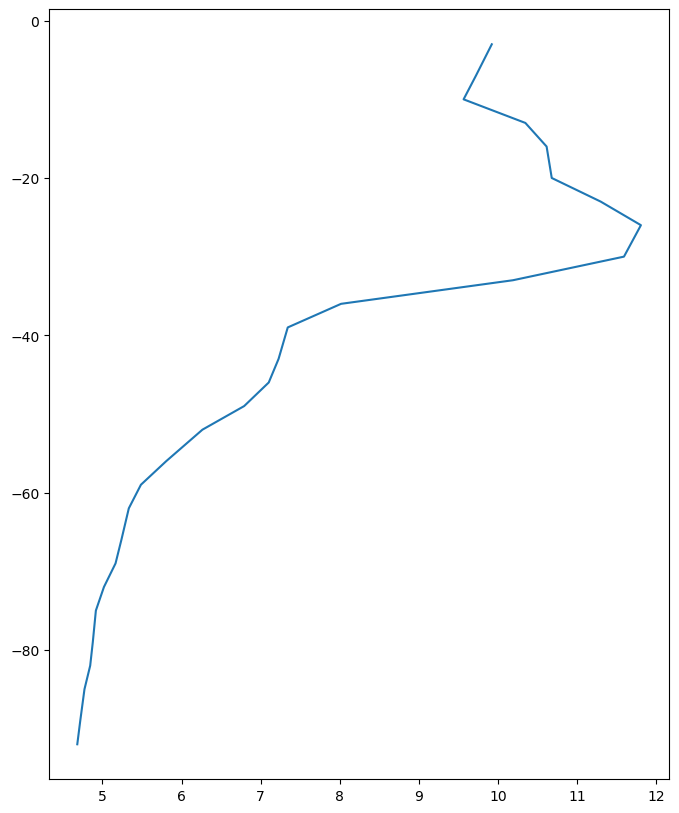

In [136]:
# Depth Profiles
fig,axs = plt.subplots(figsize = (8,10))
axs.plot(dabob10_13[' Oxygen Conc. (mg/L)'],dabob10_13['Depth'],label = 'Dabob Bay')
